# Analyzing COVID-19 in the United States and Its Impact

Throughout the final unit we have explored COVID-19 and its spread throughout the world. 

The visualizations in this notebook will focus on and explore its impact on the United States.

In [ ]:
#Import all libraries you may need in this cell:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline

## 1 - Finding the COVID-19 numbers per state.

In [ ]:
#3 lists of data compiled for your convenience

#List of states sorted in alphabetical order.
statesList = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

#list of state abbreviations
stateAbreviations = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND",
"OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]


#Corresponding latitudes for each state.
latitudes = [32.361538, 58.301935, 33.448457, 34.736009, 38.555605, 39.7391667, 41.767, 39.161921, 30.4518, 33.76,
            21.30895, 43.613739, 39.783250, 39.790942, 41.590939, 39.04, 38.197274, 30.45809, 44.323535, 38.972945,
            42.2352, 42.7335, 44.95,32.320, 38.572954,46.595805,40.809868,39.160949,43.220093, 40.221741,35.667231,
            42.659829,35.771, 48.813343,39.962245, 35.482309,44.931109, 40.269789, 41.82355, 34.000,  44.367966,36.165,
            30.266667,40.7547,44.26639, 37.54, 47.042418,38.349497,43.074722, 41.145548]

#Corresponding longitudes for each state.
longitudes = [-86.279118,-134.419740,-112.073844, -92.331122,-121.468926 ,-104.984167 ,-72.677 , -75.526755 ,
              -84.27277,-84.39,-157.826182 ,-116.237651 ,-89.650373 ,-86.147685 ,-93.620866 ,-95.69 , -84.86311
              ,-91.140229 ,-69.765261 ,-76.501157 ,-71.0275 ,-84.5467 , -93.094 ,-90.207 , -92.189283
              , -112.027031 ,-96.675345 ,-119.753877 ,-71.549127 , -74.756138, -105.964575 , -73.781339 ,-78.638 
              ,-100.779004 ,-83.000647 , -97.534994,-123.029159 ,-76.875613 , -71.422132, -81.035, -100.336378
              ,-86.784 ,-97.75 ,-111.892622 ,-72.57194 ,-77.46 ,-122.893077 ,-81.633294 ,-89.384444 ,-104.802042]


Use the New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create **two functions** that takes the name of a state as input and returns the bar plots of 1) # of cases over time and 2) # of deaths over time for that specific state.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv", parse_dates= ["date"])
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df_cases = df.loc[:, ["date", "state", "cases"]] #creates a new df with all rows but only the specific columns we need
df_deaths = df.loc[:, ["date", "state", "deaths"]]
df_deaths.head()

,date,state,deaths
0,2020-01-21,Washington,0
1,2020-01-22,Washington,0
2,2020-01-23,Washington,0
3,2020-01-24,Illinois,0
4,2020-01-24,Washington,0


In [ ]:
def plot_cases(state):
  df_state_cases = df_cases.loc[df["state"] == state] #creates a df that looks for the specific state's cases
  fig = plt.figure() #creates a figure
  ax = fig.add_axes([0, 0, 1.5, 1.5]) #starting point on x, starting point on y, length, width
  dates = df_state_cases["date"] #x values
  cases = df_state_cases["cases"] #y values

  plt.plot(dates,cases) 
  plt.bar(dates,cases)
  ax.xaxis.set_major_locator(plt.MaxNLocator(8)) #seperates the x values into 8 parts (for 8 months)
  plt.xlabel("Dates (months)")
  plt.ylabel("Number of Cases")
  plt.title("COVID-19 Cases in " + state + " Over Time")

  plt.show()

In [ ]:
def plot_deaths(state):
  df_state_deaths = df_deaths.loc[df["state"] == state]
  fig = plt.figure() #creates a figure
  ax = fig.add_axes([0, 0, 1.5, 1.5]) #starting point on x, starting point on y, length, width
  dates = df_state_deaths["date"] #x values
  deaths = df_state_deaths["deaths"] #y values

  plt.plot(dates,deaths)
  plt.bar(dates,deaths)
  ax.xaxis.set_major_locator(plt.MaxNLocator(5))
  plt.xlabel("Dates (months)")
  plt.ylabel("Number of Deaths")
  plt.title("COVID-19 Deaths in " + state + " Over Time")

  plt.show()

Call the functions on your assigned state to visualize the data.

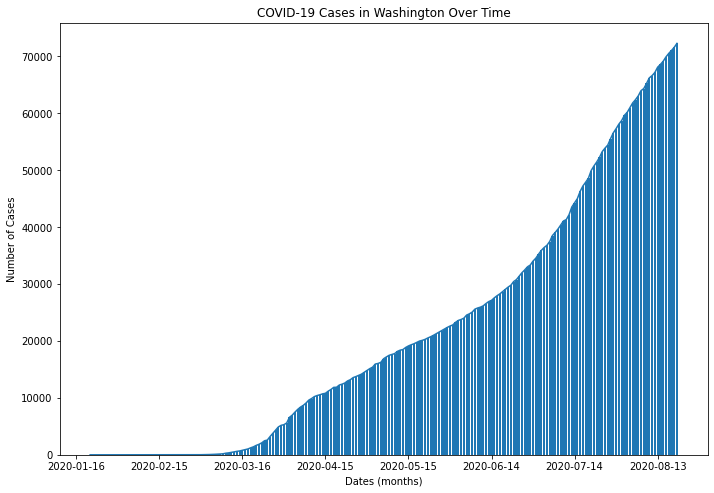

In [ ]:
plot_cases("Washington")

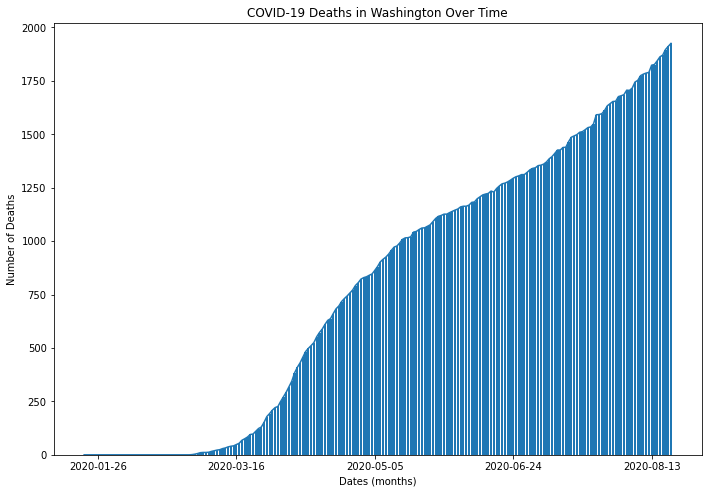

In [ ]:
plot_deaths("Washington")

Use New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create a choropleth map of the United States based on its numbers of COVID-19 cases and deaths. (Use colors that you think are appropriate).

In [ ]:
#Dataframe Formatter
def dfFormatter(df, selectColumn):
    #Separate df_formatted from df. Create list of states and their latitudes and longitudes.
    df_formatted = pd.DataFrame(statesList, columns = ['state'])
    df_formatted['lat'] = latitudes
    df_formatted['long'] = longitudes
    
    #Create columns for each date, start off by zeroing out everything.
    #previousDate = datetime.datetime(2020, 1, 1) #Commented out because datetime is no longer a type.
    previousDate = "2020-01-01"
    for i in range(len(df['date'])):
        if df['date'][i] != previousDate:
            df_formatted[df['date'][i]] = 0

    #Set index to states temporarily.
    df_formatted.set_index('state', inplace=True)

    
    #Select which data you want to use based on the column that you are plotting (cases or deaths)
    if selectColumn == 'cases':
        #Get number of cases from df and put them in df_formatted.  
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['cases'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'
    elif selectColumn == 'deaths':
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['deaths'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'

    
    #Reset index when done so that state becomes a column without being the index.
    df_formatted.reset_index(inplace=True)
    
    #Drop last 5 rows because we are focusing on the 50 states.
    df_formatted.drop([50,51,52,53,54], inplace=True)
        
    return df_formatted

In [ ]:
#Call the function and assign what it returns to the dataframe variables you will be using.
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
formatted_cases_df = dfFormatter(df, "cases") #executes the function for cases
formatted_cases_df["state abrev."] = stateAbreviations #adds a list of state abbreviations

formatted_deaths_df = dfFormatter(df, "deaths") #executes the function for cases
formatted_deaths_df["state abrev."] = stateAbreviations

In [ ]:
def visualize_cases(date):

  colors = ["#FF4D00", "#FF6400", "#FF7800", "#FF8B00",  "#FF9E00", "#FFAE00", "#FFD800",
          "#FFE800 ", "#FFF700", "#E8FF00", "#D8FF00",  "#C1FF00", "#B2FF00", "#8BFF00",
          "#2EFF00", "#1BFF00", "#17FF00", "#0CFF00",  "#00FF0C", "#00FF2A", "#00FF3E"] #list of colors

  fig = go.Figure(data = go.Choropleth(
    locationmode = "USA-states", # determines the set of locations used to match the locations variable
    locations = formatted_cases_df["state abrev."], #sets the coordinates using state abreviations
    z = formatted_cases_df[date],
    colorscale = colors, #sets the colors to our colors list
    autocolorscale = False, #since we're using our own specific colors, we set it to false
    reversescale = True #to have the colors be reversed
  ))

  fig.update_layout(
    title_text = "Number of COVID-19 Cases in the USA", #sets the title
    geo = dict(showcoastlines = True, scope = "usa") #adds coastlines to places without color
  )
  map = fig.show()
  return map

In [ ]:
def visualize_deaths(date):

  colors = ["#FF4D00", "#FF6400", "#FF7800", "#FF8B00",  "#FF9E00", "#FFAE00", "#FFD800",
          "#FFE800 ", "#FFF700", "#E8FF00", "#D8FF00",  "#C1FF00", "#B2FF00", "#8BFF00",
          "#2EFF00", "#1BFF00", "#17FF00", "#0CFF00",  "#00FF0C", "#00FF2A", "#00FF3E"]

  fig = go.Figure(data = go.Choropleth(
    locationmode = "USA-states",
    locations = formatted_deaths_df["state abrev."],
    z = formatted_deaths_df[date],
    colorscale = colors,
    autocolorscale = False,
    reversescale = True
  ))

  fig.update_layout(
    title_text = "Number of COVID-19 Deaths in the USA",
    geo = dict(showcoastlines = True, scope = "usa") #adds coastlines to places without color
  )
  map = fig.show()
  return map

In [ ]:
visualize_cases("2020-05-29")

In [ ]:
visualize_deaths("2020-06-29")

## 2 - Analyzing Its Impact on the United States

Group 2 - 

Testing has been an important factor in identifying those who have been exposed to the virus and thus the containment it. 

Using the following dataset from healthdata.gov(https://healthdata.gov/dataset/new-york-state-statewide-covid-19-testing) to analyze testing in New York State, create one bar plot of # of tests conducted per day and another bar plot of # of new positives found per day.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
testing = pd.read_csv("/content/drive/My Drive/New_York_State_Statewide_COVID-19_Testing.csv")
testing.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,03/01/2020,Albany,0,0,0,0
1,03/02/2020,Albany,0,0,0,0
2,03/03/2020,Albany,0,0,0,0
3,03/04/2020,Albany,0,0,0,0
4,03/05/2020,Albany,0,0,3,3


In [ ]:
tests_conducted = testing.loc[:, ["Test Date", "County", "Total Number of Tests Performed"]]
tests_positive = testing.loc[:, ["Test Date", "County", "New Positives"]]

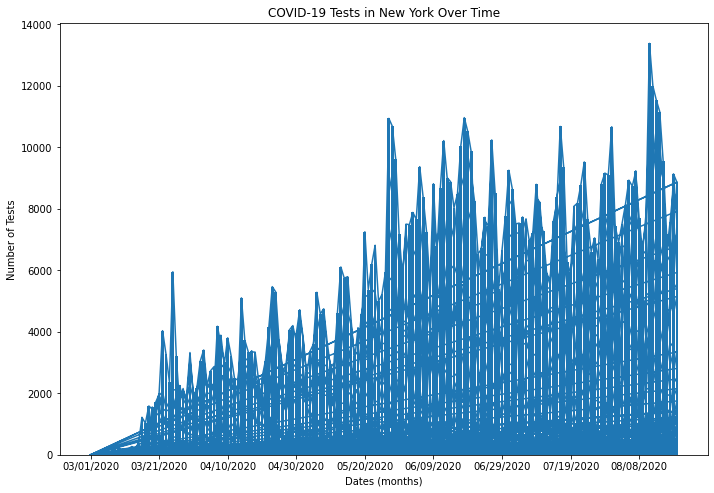

In [ ]:
#graph for total # of tests conducted
fig = plt.figure()
ax = fig.add_axes([0, 0, 1.5, 1.5])
dates = tests_conducted["Test Date"] #x values
tests = tests_conducted["Total Number of Tests Performed"] #y values

plt.plot(dates,tests)
plt.bar(dates,tests)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel("Dates (months)")
plt.ylabel("Number of Tests")
plt.title("COVID-19 Tests in New York Over Time")

plt.show()

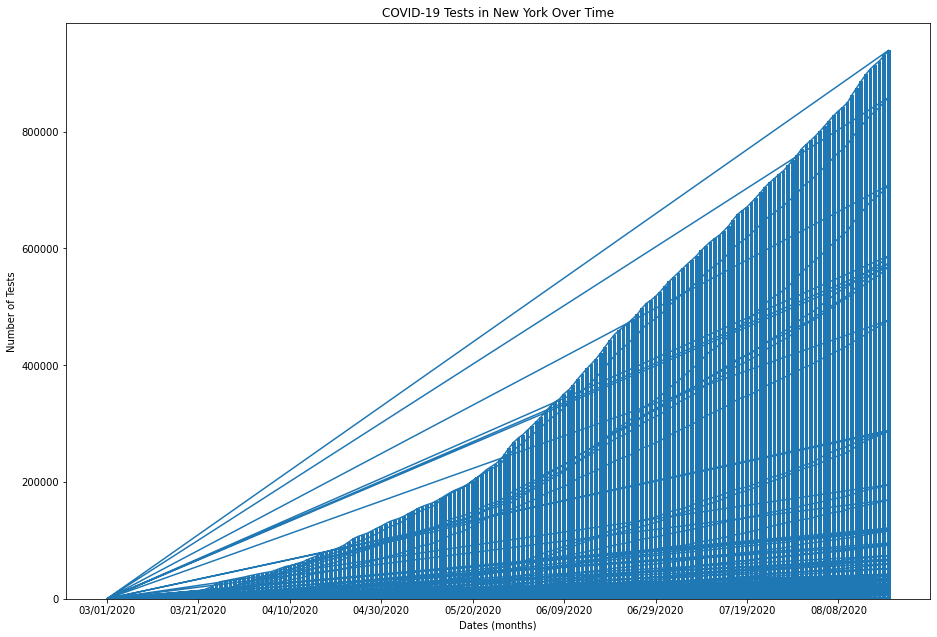

In [ ]:
#graph using the cumulative # of tests performed
tests_conducted2 = testing.loc[:, ["Test Date", "County", "Cumulative Number of Tests Performed"]]

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
dates = tests_conducted2["Test Date"] #x values
tests2 = tests_conducted2["Cumulative Number of Tests Performed"] #y values

plt.plot(dates,tests2)
plt.bar(dates,tests2)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel("Dates (months)")
plt.ylabel("Number of Tests")
plt.title("COVID-19 Tests in New York Over Time")

plt.show()

In [ ]:
def covid_NY_tests(county):
  tests_conducted2 = testing.loc[:, ["Test Date", "County", "Total Number of Tests Performed"]] 
  tests_conducted_county = tests_conducted2.loc[tests_conducted2["County"] == county] #creates df with specific county data

  fig = plt.figure() #creates a figure
  ax = fig.add_axes([0, 0, 1.5, 1.5]) #starting point on x, starting point on y, length, width
  dates = tests_conducted_county["Test Date"] #x values
  tests = tests_conducted_county["Total Number of Tests Performed"] #y values

  plt.plot(dates,tests)
  plt.bar(dates,tests)
  ax.xaxis.set_major_locator(plt.MaxNLocator(5))
  plt.xlabel("Dates (months)")
  plt.ylabel("Number of tests")
  plt.title("COVID-19 tests in " + county + " Over Time")

  plt.show()

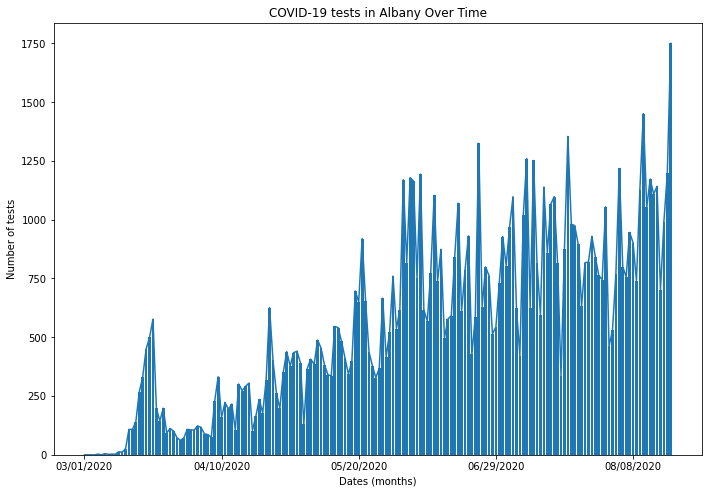

In [ ]:
covid_NY_tests("Albany")

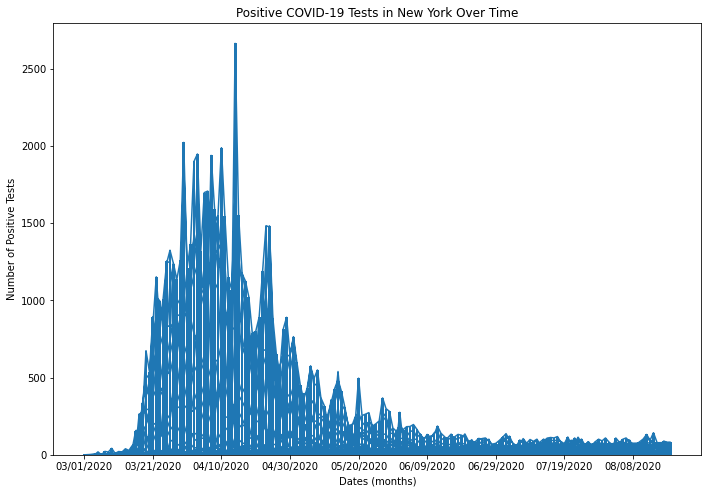

In [ ]:
#graph for total # of positive tests
fig = plt.figure()
ax = fig.add_axes([0, 0, 1.5, 1.5])
dates = tests_positive["Test Date"] #x values
positives = tests_positive["New Positives"] #y values

plt.plot(dates,positives)
plt.bar(dates,positives)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel("Dates (months)")
plt.ylabel("Number of Positive Tests")
plt.title("Positive COVID-19 Tests in New York Over Time")

plt.show()

## 3 - Challenge (optional): Find a dataset online that explores other ways that COVID-19 has impacted the United States and use pandas and Plotly to create a visualization based on it.

Some ideas:
* number of business closures in each state over time
* number of people telecommuting in the US
* number of hospitalizations in each state

etc..